In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from math import radians, sin,cos,sqrt,atan2

# Importing the data

In [2]:
school = pd.read_excel("general school information (fact).xlsx")
teacher = pd.read_excel("teachers data.xlsx")
expulsions = pd.read_excel("Expulsions.xlsx")
suspension = pd.read_excel("Suspensions.xlsx")
genders = pd.read_excel("Gender Enrollement.xlsx")


# Cleaning data

In [3]:
# List of columns to sum
columns_to_sum = [
    'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
    
    'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',
    
    'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',

    'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',
   
    'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',

    'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',
  
    'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',

    'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',
   
    'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt',

]

columns_to_sum2 = ['Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
                   'Percentage of Students Who Are New to Canada from a Non-French Speaking Country']

columns_to_drop = [
    'School Special Condition Code',
    'P.O. Box', 'Street', 'Municipality','Fax Number','Building Suite',
    'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
    'Change in Grade 3 Reading Achievement Over Three Years',
    'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',
    'Change in Grade 3 Writing Achievement Over Three Years',
    'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',
    'Change in Grade 3 Mathematics Achievement Over Three Years',
    'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',
    'Change in Grade 6 Reading Achievement Over Three Years',
    'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',
    'Change in Grade 6 Writing Achievement Over Three Years',
    'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',
    'Change in Grade 6 Mathematics Achievement Over Three Years',
    'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',
    'Change in Grade 9 Academic Mathematics Achievement Over Three Years',
    'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',
    'Change in Grade 9 Applied Mathematics Achievement Over Three Years',
    'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt',
    'Change in Grade 10 OSSLT Literacy Achievement Over Three Years',
    'Percentage of School-Aged Children Who Live in Low-Income Households',
    'Percentage of Students Whose Parents Have No Degree, Diploma or Certificate',
    'Percentage of Students Whose First Language Is Not English',
    'Percentage of Students Whose First Language Is Not French',
    'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
    'Percentage of Students Who Are New to Canada from a Non-French Speaking Country',
    'Extract Date',
    'Percentage of Students Receiving Special Education Services',
    'Percentage of Students Identified as Gifted'
]



# Creating a new column called Overall Well Performing Kids
for col in columns_to_sum:
    if col in school.columns:
        school[col] = pd.to_numeric(school[col].str.rstrip('%'), errors='coerce') / 100

school['overall well performing kids%'] = school[columns_to_sum].mean(axis=1)

school['overall well performing kids%'] = (school['overall well performing kids%'] * 100).round(2)

# Creating a new column for international kids 
for col in columns_to_sum2:
    if col in school.columns:
        school[col] = pd.to_numeric(school[col].str.rstrip('%'), errors='coerce') / 100

school['international kids%'] = school[columns_to_sum2].mean(axis=1)

school['international kids%'] = (school['international kids%'] * 100).round(2)

school['gifted kids%'] = school['Percentage of Students Identified as Gifted']

# finally dropping all the unwanted columns
school = school.drop(columns=[col for col in columns_to_drop if col in school.columns])

  

In [4]:
school['gifted kids%'] = pd.to_numeric(school['gifted kids%'].str.rstrip('%'), errors='coerce')

In [5]:
# seeing all the column names for the dataframe
school.columns

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Level', 'School Language',
       'Grade Range', 'City', 'Province', 'Postal Code', 'Phone Number',
       'School Website', 'Board Website', 'Enrolment', 'Latitude', 'Longitude',
       'overall well performing kids%', 'international kids%', 'gifted kids%'],
      dtype='object')

In [6]:
school.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Level,School Language,Grade Range,City,...,Postal Code,Phone Number,School Website,Board Website,Enrolment,Latitude,Longitude,overall well performing kids%,international kids%,gifted kids%
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Secondary,English,9-12,Sault Ste Marie,...,P6B4J4,705-945-7194,http://www.adsb.on.ca,www.adsb.on.ca,200,46.53477,-84.3077,NaN,0.0,0.0
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Anna McCrea Public School,Public,Elementary,English,JK-8,Sault Ste Marie,...,P6A3M7,705-945-7106,http://www.adsb.on.ca/sites/schools/amc/defaul...,www.adsb.on.ca,180,46.50593,-84.2873,59.67,0.0,0.0
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),67679,Arthur Henderson Public School,Public,Elementary,English,JK-8,Bruce Mines,...,P0R1C0,705-785-3483,http://www.adsb.on.ca/sites/schools/art/defaul...,www.adsb.on.ca,65,46.30183,-83.7802,68.67,0.0,0.0
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Ben R McMullin Public School,Public,Elementary,English,JK-8,Sault Ste Marie,...,P6B5K2,705-945-7108,http://www.adsb.on.ca/sites/schools/brm/defaul...,www.adsb.on.ca,175,46.52455,-84.2980,41.33,2.5,0.0
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Blind River Public School,Public,Elementary,English,JK-8,Blind River,...,P0R1B0,705-356-7752,http://www.adsb.on.ca/sites/schools/bli/defaul...,www.adsb.on.ca,150,46.18454,-82.9576,45.50,0.0,0.0


In [7]:
genders= genders.dropna()
print(genders.isnull().sum())

Board Number         0
Board Name           0
Elementary Male      0
Elementary Female    0
Secondary Male       0
Secondary Female     0
Total Male           0
Total Female         0
dtype: int64


### Mergining the Data

In [8]:
df1 = pd.merge(school, teacher, on='Board Name', how='outer')
df2 = pd.merge(df1,expulsions, on = ['Board Name', 'Board Number'], how = 'outer')
df3 = pd.merge(df2, suspension, on =['Board Name', 'Board Number'], how = 'outer')
df4 = pd.merge(df3, genders, on = ['Board Number', 'Board Name'], how = 'outer' )

In [9]:
df = df4.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4879 entries, 0 to 4878
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Board Number                   4877 non-null   object 
 1   Board Name                     4879 non-null   object 
 2   Board Type                     4876 non-null   object 
 3   School Number                  4876 non-null   float64
 4   School Name                    4876 non-null   object 
 5   School Type                    4876 non-null   object 
 6   School Level                   4876 non-null   object 
 7   School Language                4876 non-null   object 
 8   Grade Range                    4876 non-null   object 
 9   City                           4791 non-null   object 
 10  Province                       4791 non-null   object 
 11  Postal Code                    4791 non-null   object 
 12  Phone Number                   4665 non-null   o

In [10]:
df = df.dropna(subset=['School Name','Total Male','Latitude'])
print(df.isnull().sum())
print(df.shape)

Board Number                       0
Board Name                         0
Board Type                         0
School Number                      0
School Name                        0
School Type                        0
School Level                       0
School Language                    0
Grade Range                        0
City                               2
Province                           2
Postal Code                        2
Phone Number                     128
School Website                    47
Board Website                      0
Enrolment                          0
Latitude                           0
Longitude                          0
overall well performing kids%    471
international kids%              132
gifted kids%                     132
Total Educators                    0
Expulsion Rate                     0
Suspension Rate                    0
Elementary Male                    0
Elementary Female                  0
Secondary Male                     0
S

In [11]:
col = ['overall well performing kids%', 'international kids%','gifted kids%']
df[col] = df[col].fillna(0)

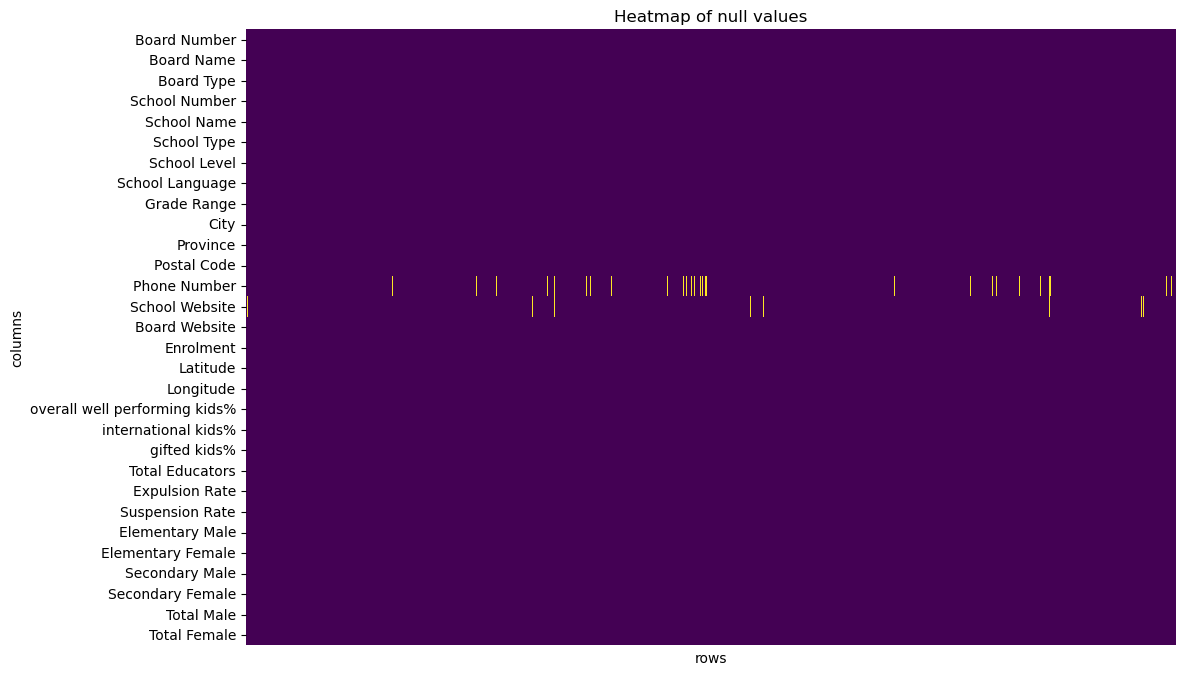

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# visualizing null values

null_mask = df.isnull()
plt.figure(figsize = (12,8))

sns.heatmap(null_mask.T, cbar = False, cmap = 'viridis',xticklabels= False)


plt.title("Heatmap of null values")
plt.xlabel('rows')
plt.ylabel('columns')
plt.show()

# Creating Model 

In [14]:
def combine(row): 
    important_features = [    
        row['School Name'],
        row['School Type'],
        row['School Language']
    ]
    return ' '.join(str(feature).lower() for feature in important_features if str(feature)!= 'nan')


df['combined_features'] = df.apply(combine, axis =1)

df.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Level,School Language,Grade Range,City,...,Total Educators,Expulsion Rate,Suspension Rate,Elementary Male,Elementary Female,Secondary Male,Secondary Female,Total Male,Total Female,combined_features
3,B28002,DSB Ontario North East,Pub Dist Sch Brd (E/F),45578.0,Bertha Shaw Public School,Public,Elementary,English,JK-6,South Porcupine,...,527.15,0.0006,0.0829,2130.0,2050.0,1325.0,1135.0,3460.0,3185.0,bertha shaw public school public english
4,B28002,DSB Ontario North East,Pub Dist Sch Brd (E/F),97969.0,Central School,Public,Elementary,English,JK-6,Kirkland Lake,...,527.15,0.0006,0.0829,2130.0,2050.0,1325.0,1135.0,3460.0,3185.0,central school public english
5,B28002,DSB Ontario North East,Pub Dist Sch Brd (E/F),252018.0,Clayton Brown Public School,Public,Elementary,English,JK-8,Hearst,...,527.15,0.0006,0.0829,2130.0,2050.0,1325.0,1135.0,3460.0,3185.0,clayton brown public school public english
6,B28002,DSB Ontario North East,Pub Dist Sch Brd (E/F),902292.0,Cochrane High School,Public,Secondary,English,9-12,Cochrane,...,527.15,0.0006,0.0829,2130.0,2050.0,1325.0,1135.0,3460.0,3185.0,cochrane high school public english
7,B28002,DSB Ontario North East,Pub Dist Sch Brd (E/F),114073.0,Cochrane Public School,Public,Elementary,English,JK-8,Cochrane,...,527.15,0.0006,0.0829,2130.0,2050.0,1325.0,1135.0,3460.0,3185.0,cochrane public school public english


Running a recommendation system on numerical features 

In [ ]:
print(df.columns.tolist())

['Board Number', 'Board Name', 'Board Type', 'School Number', 'School Name', 'School Type', 'School Level', 'School Language', 'Grade Range', 'City', 'Province', 'Postal Code', 'Phone Number', 'School Website', 'Board Website', 'Enrolment', 'Latitude', 'Longitude', 'overall well performing kids%', 'international kids%', 'gifted kids%', 'Total Educators', 'Expulsion Rate', 'Suspension Rate', 'Elementary Male', 'Elementary Female', 'Secondary Male', 'Secondary Female', 'Total Male', 'Total Female']


In [44]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [45]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance

def recommend_schools_cosine(df, school_name, num_recommendations=5):
    if school_name not in df.index:
        return "School not found in the database. :("

    entered_school = df.loc[school_name]
    entered_school_level = entered_school['School Level']
    entered_lat = entered_school['Latitude']
    entered_lon = entered_school['Longitude']

    idx = df.index.get_loc(school_name)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    filtered_scores = [
        score for score in sim_scores
        if df.iloc[score[0]]['School Level'] == entered_school_level
        and df.index[score[0]] != school_name
        and haversine_distance(entered_lat, entered_lon, 
                               df.iloc[score[0]]['Latitude'], 
                               df.iloc[score[0]]['Longitude']) <= 5  # 5 km limit
    ]

    top_recommendations = filtered_scores[:num_recommendations]
    recommendations = [
        (df.index[i[0]], i[1], haversine_distance(entered_lat, entered_lon, df.iloc[i[0]]['Latitude'], df.iloc[i[0]]['Longitude'])) 
        for i in top_recommendations
    ]

    return recommendations


In [46]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler



df_std = df[['International Kids', 'Gifted Students', 'Students with Provincial Mathematics Standard']]
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_std), columns=df_std.columns, index=df_std.index)

# KNN Model
knn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn_model.fit(df_normalized)

NearestNeighbors(metric='euclidean', n_neighbors=6)

In [47]:
def recommend_schools_knn(school_name, df=df_normalized, model=knn_model):
    if school_name not in df.index:
        return "School not found in dataset"
    
    school_features = df.loc[school_name].values.reshape(1, -1)
    distances, indices = model.kneighbors(school_features)
    
    recommended_schools = df.index[indices[0][1:]].tolist()  # Skip the first (self)
    return recommended_schools

In [50]:
def hybrid_recommend_schools(df, school_name, num_recommendations=5, cosine_weight=0.6, knn_weight=0.4):
    if school_name not in df.index:
        return "School not found in the database. :("

    entered_school = df.loc[school_name]
    entered_school_level = entered_school['School Level']

    # Get cosine similarity recommendations
    cosine_recs = recommend_schools_cosine(df, school_name, num_recommendations=10)
    
    # Get KNN recommendations
    knn_recs = recommend_schools_knn(school_name)
    
    # Create a dictionary to store combined scores
    combined_scores = {}
    
    # Process cosine similarity recommendations
    for school, score, distance in cosine_recs:
        if school != school_name and df.loc[school]['School Level'] == entered_school_level:
            combined_scores[school] = {
                'cosine_score': score,
                'knn_score': 0,
                'distance': distance
            }
    
    # Process KNN recommendations
    for i, school in enumerate(knn_recs):
        if school != school_name and df.loc[school]['School Level'] == entered_school_level:
            if school in combined_scores:
                combined_scores[school]['knn_score'] = 1 - (i / len(knn_recs))
            else:
                # If the school is not in cosine recommendations, add it
                school_data = df.loc[school]
                distance = haversine_distance(entered_school['Latitude'], entered_school['Longitude'], 
                                              school_data['Latitude'], school_data['Longitude'])
                combined_scores[school] = {
                    'cosine_score': 0,
                    'knn_score': 1 - (i / len(knn_recs)),
                    'distance': distance
                }
    
    # Calculate weighted scores
    for school in combined_scores:
        combined_scores[school]['weighted_score'] = (
            cosine_weight * combined_scores[school]['cosine_score'] +
            knn_weight * combined_scores[school]['knn_score']
        )
    
    # Sort schools by weighted score
    sorted_schools = sorted(combined_scores.items(), key=lambda x: x[1]['weighted_score'], reverse=True)
    
    # Return top recommendations
    top_recommendations = sorted_schools[:num_recommendations]
    return [(school, data['weighted_score'], data['distance']) for school, data in top_recommendations]

In [51]:
# Example usage
school_name = "Algoma Education Connection Secondary School"
hybrid_recommendations = hybrid_recommend_schools(df, school_name)

print(f"Hybrid Recommendations for {school_name}:")
for school, score, distance in hybrid_recommendations:
    print(f"School: {school}, Hybrid Score: {score:.4f}, Distance: {distance:.2f} KM")

Hybrid Recommendations for Algoma Education Connection Secondary School:
School: Holy Angels Learning Centre, Hybrid Score: 0.0762, Distance: 2.86 KM
School: Superior Heights Collegiate and Vocational School, Hybrid Score: 0.0139, Distance: 3.29 KM
School: White Pines Collegiate and Vocational School, Hybrid Score: 0.0128, Distance: 4.05 KM
School: St Mary's College Separate School, Hybrid Score: 0.0101, Distance: 2.80 KM
School: École secondaire NotreDameduSault, Hybrid Score: 0.0000, Distance: 2.14 KM


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
